In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('stress.csv')

In [3]:
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [4]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [5]:
import nltk

In [6]:
import re #regular expresion

In [7]:
import string

In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

In [11]:
import matplotlib.pyplot as plt

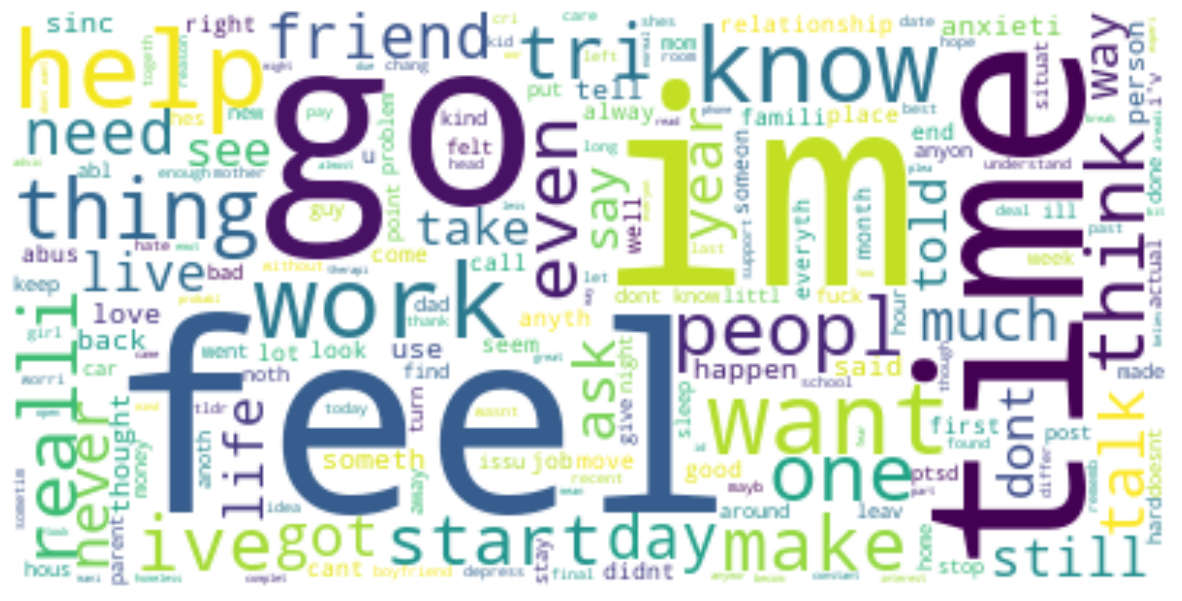

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
#!pip install wordcloud

In [15]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33
                                                )

In [17]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

In [18]:
model.score(xtest,ytest)

0.7470651013874067

In [19]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
model1.score(xtest,ytest)

0.7193169690501601

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [26]:
user = input("entr ur text:")
datadf = cv.transform([user]).toarray()
output = model.predict(datadf)
print(output)

entr ur text:not
['No Stress']
